<h1><center>Exercises

<div>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left" width=700/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td></center>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">




In [2]:
# Libraries import
!pip install plotly --upgrade
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 96.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


>In this notebook, we will explore a dataset containing restaurant transactions, including total bill amounts, tips, customer demographics, and visit details. The goal is to analyze and visualize patterns using various types of graphs. Please use the function that we used in the precedent labs to load the dataset.

In [19]:
url = 'https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/tips.csv'
data_tips = pd.read_csv(url)
data_tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

###**Exercise 1**
>Now it's your turn ! Create a **barplot** so that we can see **the number of male customers during lunch time**.
>
>Be sure to name your graph and the axes.

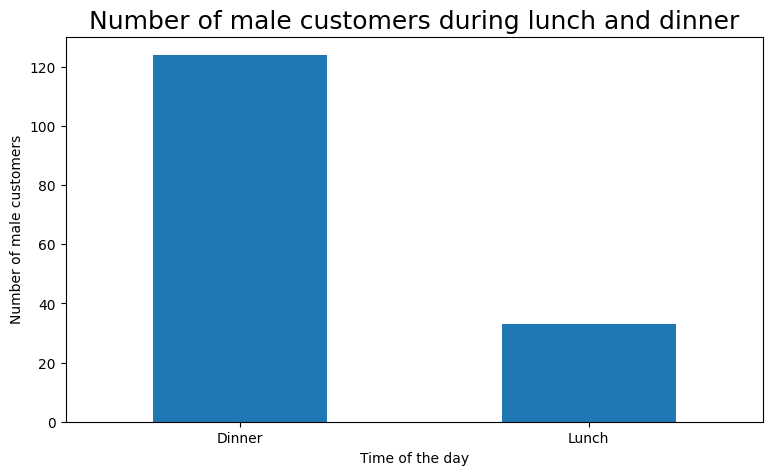

In [20]:
fig=plt.figure(figsize=(9,5))
data_gender = data_tips[data_tips['sex'] == "Male"]
data_dinner = data_gender['time'].value_counts()
graph = data_dinner.plot(kind='bar')
graph.set_title('Number of male customers during lunch and dinner', size=18)
graph.set_xlabel('Time of the day')
graph.set_ylabel('Number of male customers')
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)
plt.plot();

###**Exercise 2**
>Create a **pie chart** that shows **the proportion of female customers visiting each day**. Percentage should be indicated on the chart and rounded at 2 digit, for this you can use `autopct=%.2f%%'` as an argument in the pie plot function.
>
>**autopct** enables you to display the percent value rounded to the rounding you wish.


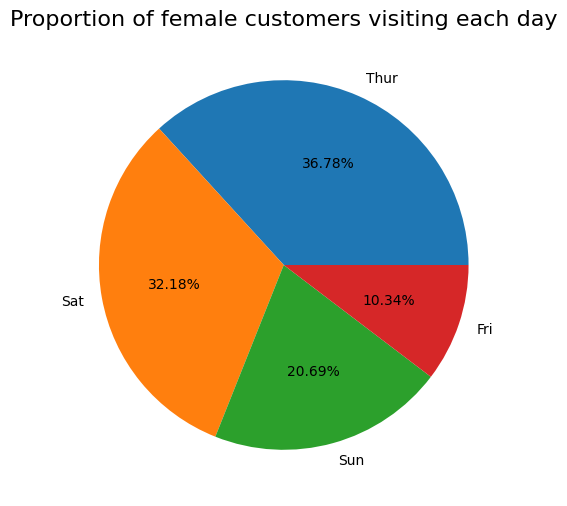

In [21]:
fig = plt.figure(figsize=(9,5))
data_pie = data_tips[data_tips["sex"]=="Female"]['day'].value_counts()
graph = data_pie.plot(kind='pie', figsize=(9,6), autopct='%.2f%%', label='')
graph.set_title("Proportion of female customers visiting each day", size=16)
plt.show();

###**Exercise 3**

>Create the boxplot visualizing the relationship between tips, gender, and smoking status. The x-axis should represent the gender. The y-axis should represent the amount of tip. Use the `hue` parameter to differentiate between smoker status. Don't forget to add appropriate axis labels and a title to the graph.

<h2> Important: This question answers the Moodle quiz question 1. <h2>

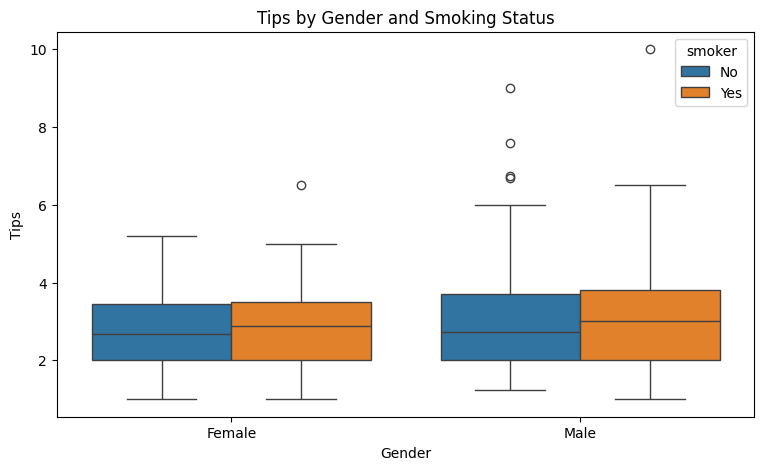

In [22]:
fig, ax = plt.subplots(figsize=(9,5))
graph = sns.boxplot(x='sex', y='tip', hue='smoker', data=data_tips, ax=ax)
graph.set_xlabel('Gender')
graph.set_ylabel('Tips')
ax.set_title("Tips by Gender and Smoking Status")
plt.show();

### **Exercise 4**

> Create a Treemap that displays the **average tip amount** based on gender, smoking status, day, and time of the meal using `plotly_express`. Group the data using `groupby()` to calculate the average `tip` per `sex`, `day`, and `time`. Use `px.treemap()` to generate an interactive Treemap.

> We want to have this hierarchy (path) in the Treemap: `sex` → `day` → `time`.




<h2> Important: This question answers the Moodle quiz question 2. <h2>

In [30]:
df = data_tips.groupby(['sex','day','time'])[['tip']].mean().reset_index()

df["all"] = "all"

fig = px.treemap(df,path=['sex','day','time'], values = 'tip')
fig.show()

### **Exercise 5**
>Create a heatmap of correlations of columns `total_bill`, `tip`, `sex` and `size`. Like with every other data visualization tool, you can improve its look so that it's easier to read and understand.
>
>For example, you can try to show the values of the correlations on each cell of the heatmap. Use this [link](https://likegeeks.com/seaborn-heatmap-tutorial/) to find out how to easily do so.

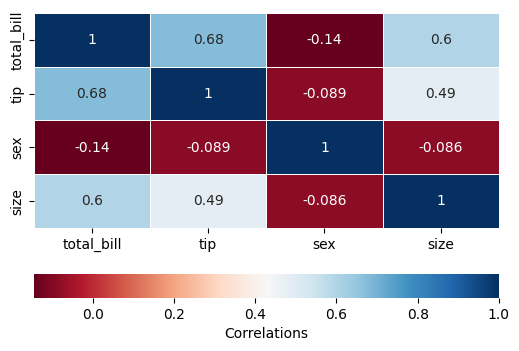

In [ ]:
# Convert the 'sex' column to binary values: Female → 1, Male → 0
# ⚠️ Do not modify this mapping, as it is required for consistency in data processing
data_tips_updated = data_tips.copy()
data_tips_updated['sex_update'] = data_tips_updated['sex'].map({'Female': 1, 'Male': 0})


#Example of code - other displays are possible
fig=plt.figure(figsize=(6,4))
heat_map = data_tips_updated[['total_bill','tip', 'sex_update', 'size']].corr()
sns.heatmap(data = heat_map,cbar_kws = dict(use_gridspec=False, orientation="horizontal", label='Correlations'),
            annot= True, linewidths= .5, cmap= 'RdBu')
plt.show();